# Sorting Algorithms

**Big-O Complexity Chart**                                

![Big-O Complexity](big_o_complexity_measure22222.png "Big-O Complexity")

___

![Big-O Complexity](big_o22222222.png "Big-O Complexity")

____

![Big-O Complexity](orderrr.png "Big-O Complexity")

____

### Plotting 

> 'Constant' , 'Logarithmic', 'Linear', 'Log Linear', 'Quadratic', 'Cubic', 'Exponential'

Text(0.5, 0, 'n  or Elements')

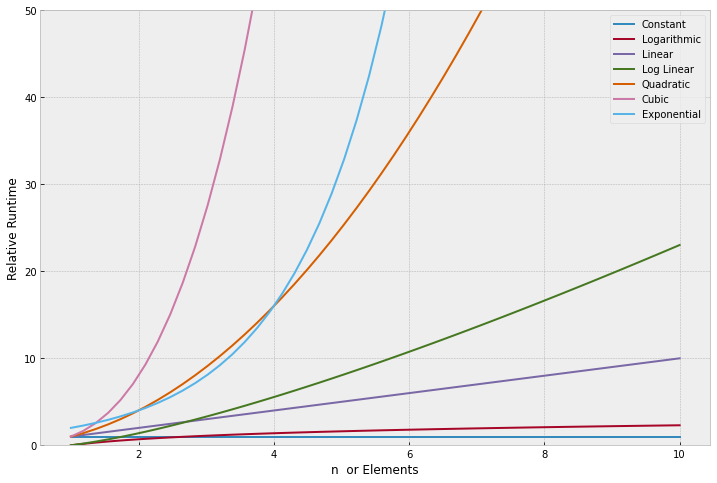

In [2]:
from math import log 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

# set up runtime comparisons
n = np.linspace(1,10)
labels = ['Constant' , 'Logarithmic', 'Linear', 'Log Linear', 'Quadratic', 'Cubic', 'Exponential']
big_o = [np.ones(n.shape), np.log(n), n, n*np.log(n), n**2, n**3, 2**n ]

# plot setup
plt.figure(figsize=(12,8))
plt.ylim(0,50)

for i in range(len(big_o)):
    plt.plot(n, big_o[i], label = labels[i])
    
plt.legend(loc=0)
plt.ylabel('Relative Runtime')
plt.xlabel("n  or Elements")

> Clealry we want to choose algorithms that stay away from any `exponential`, `quadratic`, or `cubic` behavior!

_____

# 1) Bubble Sort

**HIGHLY INEFFICIENT**

> This simple sorting algorithm iterates over a list, comparing elements in pairs and swapping them until the larger elements "bubble up" to the end of the list, and the smaller elements stay at the "bottom".


> It is a comparison-based algorithm in which each pair of adjacent elements is compared and the elements are swapped if they are not in order.

**Explanation**

* We begin by comparing the first two elements of the list. If the first element is larger than the second element, we swap them. If they are already in order we leave them as is. We then move to the next pair of elements, compare their values and swap as necessary. This process continues to the last pair of items in the list.

* Upon reaching the end of the list, it repeats this process for every item. Though, this is **HIGHLY INEFFICIENT**. What if only a single swap needs to be made in the array? Why would we still iterate though it **n^2 times**, even though it's already sorted?

* Obviously, to **optimize** the algorithm, we need to stop it when it's finished sorting, otherwise it'll reevaluate an already sorted array many times.

* How would we know that we're finished sorting? If the items were in order then we would not have to swap any. So, whenever we swap values we set a flag to **`True`** to repeat sorting process. If no swaps occurred, the flag would remain **`False`** and the algorithm will stop.

In [10]:
def bubble_sort(nums):
    
    swapped = True     # We set swapped to True so the loop looks runs at least once
    while swapped:
        swapped = False
        for i in range(len(nums) - 1):
            if nums[i] > nums[i + 1]:
                
                nums[i], nums[i + 1] = nums[i + 1], nums[i]  # Swap the elements
                
                swapped = True  # Set the flag to True so we'll loop again


# Verify it works

nums = [1, 2, 3, 8, 4]
bubble_sort(nums)
print(nums)

[1, 2, 3, 4, 8]


> The algorithm runs in a while loop, only breaking when no items are swapped. We set swapped to **`True`** in the beginning to ensure that the **`algorithm runs at least once`**.

* #### Time Complexity

> In the worst case scenario (when the list is in *reverse order*), this algorithm would have to swap every single item of the array. Our swapped flag would be set to True on every iteration.

> Therefore, if we have n elements in our list, we would have **n iterations per item** - thus Bubble Sort's time complexity is **`O(n^2)`**.

_____

# 2) Selection Sort
> This algorithm segments the list into two parts: sorted and unsorted. We continuously remove the smallest element of the unsorted segment of the list and append it to the sorted segment.

**Explanation**

* In practice, we don't need to create a new list for the sorted elements, what we do is treat the leftmost part of the list as the sorted segment. We then search the entire list for the smallest element, and swap it with the first element.

* Now we know that the first element of the list is sorted, we get the smallest element of the remaining items and swap it with the second element. This reiterates until the last item of the list is the remaining element to be examined.

In [11]:
def selection_sort(nums):
    
    for i in range(len(nums)):                        # This value of i corresponds to how many values were sorted
 
        lowest_value_index = i                        # We assume that the first item of the unsorted segment is the smallest
        
        for j in range(i + 1, len(nums)):             # This loop iterates over the unsorted items
            if nums[j] < nums[lowest_value_index]:
                lowest_value_index = j
        
        nums[i], nums[lowest_value_index] = nums[lowest_value_index], nums[i]   # Swap values of the lowest unsorted element 
                                                                                # with the first unsorted element


# Verify it works

nums = [12, 8, 3, 20, 11]
selection_sort(nums)
print(nums)

[3, 8, 11, 12, 20]


In [12]:
# NPTEL Way

def SelectionSort(l):
    #scan slices l[0:len(l)] , l[1:len(l)], ....
    for start in range(len(l)):
        # Find maximum value in slice....
        
        for i in range(start,len(l)):
            minpos = start 
            if l[i] < l[minpos]:
                minpos = i 
                #.......move it to start of slice
                (l[start],l[minpos]) = (l[minpos], l[start])
                
                
nums = [12, 8, 3, 20, 11]
SelectionSort(nums)
print(nums)          

[3, 8, 11, 12, 20]


> We see that as `i` **increases**, we need to need to **check less items**.

### Time Complexity

> We can easily get the time complexity by examining the `for loops` in the `Selection Sort algorithm`. For a list with n elements, the outer loop iterates n times.

> The inner loop iterate `n-1` when `i` is equal to `1`, and then `n-2` as `i` is equal to `2` and so forth.

> The amount of comparisons are `(n - 1) + (n - 2) + ... + 1`, which gives **Selection Sor**t a time complexity of **`O(n^2)`**.

> **`T(n) = n + (n - 1) + (n - 2) + ... + 1 = n(n+1)/2 = O(n^2)`**

> Selection Sort wont work for a length of 5000 values as we can see there will be a difference of time or Gap because `5000^2` is **beyond** `10^7`, we cant expect this to run in 1 sec.

---

# 3) Insertion Sort

> Like Selection Sort, this algorithm segments the list into sorted and unsorted parts. It iterates over the unsorted segment, and inserts the element being viewed into the correct position of the sorted list.

**Explanation**

* We assume that the first element of the list is sorted. We then go to the next element, let's call it x. If x is larger than the first element we leave as is. If x is smaller, we copy the value of the first element to the second position and then set the first element to x.

* As we go to the other elements of the unsorted segment, we continuously move larger elements in the sorted segment up the list until we encounter an element smaller than x or reach the end of the sorted segment, and then place x in it's correct position.

In [13]:
# NPTEL Way

def InsertionSort(seq):
    for sliceEnd in range(len(seq)):
        # Build longer and longer slices
        # In each iteration seq[0:SliceEnd] already sorted
        
        # Move first element after sorted slice left
        # till it is in the correct place
        pos = sliceEnd
        while pos>0 and seq[pos] < seq[pos-1]:
            (seq[pos], seq[pos-1]) = (seq[pos-1], seq[pos])
            pos-=1
        

seq = [12, 8, 3, 20, 11]
InsertionSort(seq)
print(seq)             

[3, 8, 11, 12, 20]


* **More about [Insertion Sort](https://stackabuse.com/insertion-sort-in-python/) can be found here......**

### Time Complexity

> In the worst case scenario, an array would be sorted in `reverse order`. The outer for loop in Insertion Sort function always `iterates n-1 times`.

> In the worst case scenario, the inner for loop would swap once, then swap two and so forth. **The amount of swaps would then be `1 + 2 + ... + (n - 3) + (n - 2) + (n - 1)` which gives Insertion Sort a time complexity of `O(n^2)`.**

> **`T(n) = 1 + 2 + ... + (n - 3) + (n - 2) + (n - 1) = n(n+1)/2 = O(n^2)`**

> It is also slower if we do it for more than 5000 values.

> But when we give sorted list, it returns fastly because insertion occurs instantaneously and while swapping, it checks the previous number, if it is not smaller than previous number then no need of swapping as each Insert Step takes one iteration and it is not the case in `Selection Sort` because in each iteration we have to find minimum value.

> `Insertion Sort` works better than `Selection Sort` eventhough the worst case scenario for both is of `O(n^2)`.

____

**`O(n^2)` sorting is infeasible for n over 5000**

___

# 4) Heap Sort

> This popular sorting algorithm, like the Insertion and Selection sorts, segments the list into sorted and unsorted parts. It converts the unsorted segment of the list to a Heap data structure, so that we can efficiently determine the largest element.

**Explanation**

* We begin by transforming the list into a Max Heap - a Binary Tree where the biggest element is the root node. We then place that item to the end of the list. We then rebuild our Max Heap which now has one less value, placing the new largest value before the last item of the list.

* We iterate this process of building the heap until all nodes are removed.



In [8]:
from heapq import heappop, heappush

def heap_sort(array):
    heap = []
    for element in array:
        heappush(heap, element)
    #print(heap)
    ordered = []

    # While we have elements left in the heap
    while heap:
        ordered.append(heappop(heap))

    return ordered

array = [2, 4, 5, 18, 13, 15, 17, 21, 24, 26]
print(heap_sort(array))

[2, 4, 5, 13, 15, 17, 18, 21, 24, 26]


In [15]:
def heapify(nums, heap_size, root_index):
    # Assume the index of the largest element is the root index
    largest = root_index
    left_child = (2 * root_index) + 1
    right_child = (2 * root_index) + 2

    # If the left child of the root is a valid index, and the element is greater
    # than the current largest element, then update the largest element
    if left_child < heap_size and nums[left_child] > nums[largest]:
        largest = left_child

    # Do the same for the right child of the root
    if right_child < heap_size and nums[right_child] > nums[largest]:
        largest = right_child

    # If the largest element is no longer the root element, swap them
    if largest != root_index:
        nums[root_index], nums[largest] = nums[largest], nums[root_index]
        # Heapify the new root element to ensure it's the largest
        heapify(nums, heap_size, largest)


def heap_sort(nums):
    n = len(nums)

    # Create a Max Heap from the list
    # The 2nd argument of range means we stop at the element before -1 i.e.
    # the first element of the list.
    # The 3rd argument of range means we iterate backwards, reducing the count
    # of i by 1
    for i in range(n, -1, -1):
        heapify(nums, n, i)

    # Move the root of the max heap to the end of
    for i in range(n - 1, 0, -1):
        nums[i], nums[0] = nums[0], nums[i]
        heapify(nums, i, 0)


# Verify it works

nums = [35, 12, 43, 8, 51]
heap_sort(nums)
print(nums)

[8, 12, 35, 43, 51]


**Time Complexity**

> Let's first look at the **time complexity** of the `heapify function`. In the worst case the largest element is never the root element, this causes a recursive call to heapify. While recursive calls might seem dauntingly expensive, remember that we're working with a `binary tree`.

> Visualize a `binary tree` with 3 elements, it has a height of 2. Now visualize a binary tree with 7 elements, it has a height of 3. The `tree grows logarithmically to n`. The **heapify function traverses that tree in `O(log(n))` time**.

> The heap_sort function iterates over the array n times. Therefore the overall time complexity of the **`Heap Sort algorithm`** is **`O(nlog(n))`**.

* **More about [Heap Sort](https://stackabuse.com/heap-sort-in-python/) can be found here......**

____

# 5) Merge Sort

> This `divide and conquer algorithm` splits a list in half, and keeps splitting the list by 2 until it only has singular elements.

> Adjacent elements become sorted pairs, then sorted pairs are merged and sorted with other pairs as well. This process continues until we get a sorted list with all the elements of the unsorted input list.

**Explanation**

* We *recursively split the list in half* until we have lists with size one. We then merge each half that was split, sorting them in the process.

* Sorting is done by comparing the smallest elements of each half. The first element of each list are the first to be compared. If the first half begins with a smaller value, then we add that to the sorted list. We then compare the second smallest value of the first half with the first smallest value of the second half.

* Every time we select the smaller value at the beginning of a half, we move the index of which item needs to be compared by one.


In [16]:
def merge(left_list, right_list):
    sorted_list = []
    left_list_index = right_list_index = 0

    # We use the list lengths often, so its handy to make variables
    left_list_length, right_list_length = len(left_list), len(right_list)

    for _ in range(left_list_length + right_list_length):
        if left_list_index < left_list_length and right_list_index < right_list_length:
            # We check which value from the start of each list is smaller
            # If the item at the beginning of the left list is smaller, add it
            # to the sorted list
            if left_list[left_list_index] <= right_list[right_list_index]:
                sorted_list.append(left_list[left_list_index])
                left_list_index += 1
            # If the item at the beginning of the right list is smaller, add it
            # to the sorted list
            else:
                sorted_list.append(right_list[right_list_index])
                right_list_index += 1

        # If we've reached the end of the of the left list, add the elements
        # from the right list
        elif left_list_index == left_list_length:
            sorted_list.append(right_list[right_list_index])
            right_list_index += 1
        # If we've reached the end of the of the right list, add the elements
        # from the left list
        elif right_list_index == right_list_length:
            sorted_list.append(left_list[left_list_index])
            left_list_index += 1

    return sorted_list


def merge_sort(nums):
    # If the list is a single element, return it
    if len(nums) <= 1:
        return nums

    # Use floor division to get midpoint, indices must be integers
    mid = len(nums) // 2

    # Sort and merge each half
    left_list = merge_sort(nums[:mid])
    right_list = merge_sort(nums[mid:])

    # Merge the sorted lists into a new one
    return merge(left_list, right_list)


# Verify it works
nums = [120, 45, 68, 250, 176]
nums = merge_sort(nums)
print(nums)

[45, 68, 120, 176, 250]


In [17]:
#NPTEL Way

def merge(A, B):   # Merge A[0:m], B[0:n]
    
    (C, m, n) = ([], len(A), len(B))
    (i, j) = (0,0)  # current position in A, B
    
    while i+j < m+n:  # i+j is number of elements merged so far
        
        if i==m:  # Case 1 : A is empty
            C.append(B[j])
            j+=1
        
        elif j==n: # Case 2 : B is empty
            C.append(A[i])
            i+=1
        
        elif A[i] <= B[j]: # Case 3 : Head of A smaller
            C.append(A[i])
            i+=1
        
        elif A[i] > B[j]:  # Case 4 : Head of B smaller
            C.append(B[j])
            j+=1
    
    return C


def MergeSort(A,left, right):  # sort the slice A[left:right]
    
    if right - left  <= 1: # base case
        return (A[left:right])
    
    if right - left > 1:  # Recursive call
        mid = (left+right)//2
        L = MergeSort(A,left,mid)
        R = MergeSort(A,mid,right)
        return (merge(L,R))
    
    
nums = [120, 45, 68, 250, 176]
MergeSort(nums, 0, len(nums))
        

[45, 68, 120, 176, 250]

* Note that the `merge_sort()` function, unlike the previous sorting algorithms, returns a new list that is sorted, rather than sorting the existing list.

* Therefore, *Merge Sort requires space to create a new list of the same size as the input list*.

**Time Complexity**

> Let's first look at the merge function. It takes two lists, and iterates n times, where n is the size of their combined input.

> The `merge_sort` function splits its given array in `2`, and recursively sorts the sub-arrays. As the input being recursed is half of what was given, like binary trees this makes the time it takes to process grow **`logarithmically`** to n.

> Therefore the overall time complexity of the **Merge Sort algorithm** is **`O(nlog(n))`**.

**NPTEL Way of analysing Time Complexity**

How much time does `merge()` function takes?
* Merge *A* of size *m*, *B* of size *n* into *C*
* In each iteration, we add one element to *C*
    * Size of *C* is `m+n`
    
    * `m+n <= 2 max(m,n)
* Hence `O(max(m,n)) = O(n)` if m ~ n
* So `merge()` function is linear.


> 

* T(n) : time taken by `merge sort` on input size of n
    * Assume, for simplicity, that `n = 2^k`
* **`T(n) = 2T(n/2) + n`**
    * Two subproblems of size `n/2`
    
    * Merging solutions requires time `O(n/2 + n/2) = O(n)`
* Solve the recurrence by unwinding

>

* T(1) = 1

* **`T(n) = 2T(n/2) + n`**
         = 2 [2T(n/4) + (n/2)] + n         =   2^2 T(n/2^2) + 2n
         = 2^2 [2T(n/2^3) + (n/2^2)] + 2n  =   2^3 T(n/2^3) + 3n
         .
         .
         .
         = 2^j T(n/2^j) + jn
* when j = logn, n/2^j = 1, so T(n/2^j) = 1
    * logn means log to the base 2
    
* **`T(n) = 2^j T(n/2^j) + jn`**
        = 2^logn + (logn)n
        = n + nlogn
   **`T(n) = O(n logn)`**
    



## Limitations of `MergeSort`

* **Extra storage can be costly**
* **Inherently recursive**
    * `Recursive call and return are expensive`
    * Recursive call in a programmming langauge evolvs suspending the current function, doing a new computation and then restoring the value that we have suspended for a current function

* **More about [Merge Sort](https://stackabuse.com/merge-sort-in-python/) can be found here......**

___

# 6) Quick Sort *
> **`Divide and Conquer without Merging`**

> This `divide and conquer` algorithm is the most often used sorting algorithm. When configured correctly, it's ***`extremely efficient`*** and `does not require the extra space Merge Sort uses`. We partition the list around a `pivot element`, sorting values around the pivot.

**Explanation**

* `Quick Sor`t begins by partitioning the list - picking one value of the list that will be in its sorted place. This value is called a `pivot`. All elements ***smaller than the pivot are moved to its left***. ***All larger elements are moved to its right.***
* Knowing that the pivot is in it's rightful place, we `recursively` sort the values around the pivot until the entire list is sorted.
* `This implements the Hoare partition scheme. Tony Hoare also created the Quick Sort algorithm.`

In [18]:
# There are different ways to do a Quick Sort partition, this implements the
# Hoare partition scheme. Tony Hoare also created the Quick Sort algorithm.
def partition(nums, low, high):
    # We select the middle element to be the pivot. Some implementations select
    # the first element or the last element. Sometimes the median value becomes
    # the pivot, or a random one. There are many more strategies that can be
    # chosen or created.
    

    pivot = nums[(low + high) // 2]
    i = low - 1
    j = high + 1
    while True:
        i += 1
        while nums[i] < pivot:
            i += 1

        j -= 1
        while nums[j] > pivot:
            j -= 1

        if i >= j:
            return j

        # If an element at i (on the left of the pivot) is larger than the
        # element at j (on right right of the pivot), then swap them
        nums[i], nums[j] = nums[j], nums[i]


def quick_sort(nums):
    # Create a helper function that will be called recursively
    def _quick_sort(items, low, high):
        if low < high:
            # This is the index after the pivot, where our lists are split
            split_index = partition(items, low, high)
            _quick_sort(items, low, split_index)
            _quick_sort(items, split_index + 1, high)

    _quick_sort(nums, 0, len(nums) - 1)


# Verify it works
nums = [22, 5, 1, 18, 99]
quick_sort(nums)
print(nums)

[1, 5, 18, 22, 99]


**Time Complexity**

> The worst case scenario is when the smallest or largest element is always selected as the pivot. This would create partitions of size n-1, causing recursive calls n-1 times. This leads us to a `worst case time complexity of O(n^2)`.

> While this is a terrible worst case, Quick Sort is heavily used because it's `average time complexity is much quicker`. While the partition function utilizes nested while loops, it does comparisons on all elements of the array to make its swaps. As such, it has a time complexity of O(n).

> With a good pivot, the Quick Sort function would partition the array into halves which grows `logarithmically with n`. Therefore the `average time complexity` of the **Quick Sort algorithm** is **`O(nlog(n))`**.

In [19]:
'''
NPTEL way

This shifting can be done in place, in time O(n)
Recursively sort left and right halves

T(n) = 2T(n/2) + n
     = O(n logn)

This sorts inplace

In worst case Quick Sort behaves like a insertion sort of order O(n^2)

and if we give values of length over 5000 it will give Recursion error so we have to explicitly set recursion limit

Quick sort is not as good as we believe because 
quick sort wont work as good as Merge sort when we give values beyond 5000 or 7500 
it will take appreciably long amount of time to solve if we use pivot element as first element in a list
'''

import sys 
sys.setrecursionlimit(100000)

def QuickSort(A, l, r):   # sort A[l:r]      # l -> left index   r -> right index
    if r - l <= 1:        # base case
        return ()
    
    # partition with respect to pivot, a[l]
    yellow = l+1    # yellow means numbers which are less than pivot
                    # green means numbers which are greater than pivot
    
    for green in range(l+1, r):   # l+1 is because we should not consider pivot element as 
                                  # we are assuming first element as pivot
        if A[green] <= A[l]:
            (A[yellow], A[green]) = (A[green], A[yellow])
            yellow +=1            # we have to increment the pointer yellow
            
    # move pivot into place
    (A[l], A[yellow-1]) = (A[yellow-1], A[l])
    
    QuickSort(A, l, yellow-1)   # Recursive calls
    QuickSort(A, yellow, r)
    
import random
def randomize(nums):
    for i in range(len(nums)//2):
        j = random.randrange(0, len(nums), 1)
        k = random.randrange(0, len(nums), 1)
        (nums[j],nums[k]) = (nums[k],nums[j])
        
# if we randomize, quicksort comes out very fast, and if we dont randomize it doesnt work fast even on already sorted array    
nums = list(range(5000,0,-1))
randomize(nums)
QuickSort(nums,0, len(nums))
print(nums)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

* **More about [Quick Sort](http://me.dt.in.th/page/Quicksort/) can be found here......**

### Analysis of QuickSort

**Worst Case**

* **Pivot is either maximum or minimum**
    * Ideal element we need is median value but in unsorted array we cant guess the median value
    * one partition is empty
    * other has size n-1
* and if this happens,in order to sort n elements time complexity would be
    > **T(n) = T(n-1) + n = T(n-2) + T(n-1) + n**
                        .
                        .
                        = 1 + 2 + 3 + 4 + .....+ n
                  T(n)  = O(n^2)       which is same as Insertion sort or Selection Sort
* even `already sorted array` is worst case input!!!
* But in Insertion Sort already sorted array works very well because Insert steps stops very fast
* *in worst case QuickSort is even worse than Insertion Sort, specifically on sorted arrays.*

But....

* Average case is **`O(n logn)`** though in worst case it is in O(n^2)
    * All permutations of n values, each equally likely,
    * Avearge running time across all permutations.
* Sorting is a rare example where average case can be computed, the worst case though of order O(n^2), worst case happens very rare so **QuickSort works very well on average cases.**

____

## Quick Sort: Randomization

* Worst case arises because of `fixed choice of Pivot`. 
    * we choose the first element as Pivot
    * For any fixed stratergy (last element,  midpoint), can work backwards to construct O(n^2) worst case. 
* Instead, `Choose Pivot Randomly`
    > Pick any index in range(0,n) with uniform probability
* **`Expected Running Time is again O(n logn)`**.
* In practice, **`QuickSort is very fast`**
* Typically the default algorithm for in-built sort functions.
    * Spreadsheets uses quicksort algorithm
    * Built-in sort function in programming languages, but python `sort()` function decides according to the situation but default one is QuickSort

___

# Stable Sorting

* `QuickSort as described is not stable`, if we make careful implementation we can make it stable.
    * Swap operation during partitioning disturbs original order
* **`Merge Sort is Stable`**, if we merge carefully
    * Do not allow elements from right to overtake elements from left
    * Favour left list when breaking ties
* **`InsertionSort is also Stable`**, if we make sure that we move things backwards only if they are strictly smaller, when we go backwards  and we find something which is equal to the current value we stop the Insertion

____

# Python's Built-in Sort Functions


> We can change our list to have it's contents sorted with the sort() method:

In [20]:
apples_eaten_a_day = [2, 1, 1, 3, 1, 2, 2]
apples_eaten_a_day.sort()
print(apples_eaten_a_day)               # [1, 1, 1, 2, 2, 2, 3]

[1, 1, 1, 2, 2, 2, 3]


Or we can use the sorted() function to create a new sorted list:

In [21]:
apples_eaten_a_day_2 = [2, 1, 1, 3, 1, 2, 2]
sorted_apples = sorted(apples_eaten_a_day_2)
print(sorted_apples)                   # [1, 1, 1, 2, 2, 2, 3]

[1, 1, 1, 2, 2, 2, 3]


**They both sort in `ascending order`, but we can easily sort in descending order by setting the `reverse flag` to `True`:**

In [22]:
# Reverse sort the list in-place
apples_eaten_a_day.sort(reverse=True)
print(apples_eaten_a_day) # [3, 2, 2, 2, 1, 1, 1]

# Reverse sort to get a new list
sorted_apples_desc = sorted(apples_eaten_a_day_2, reverse=True)
print(sorted_apples_desc) # [3, 2, 2, 2, 1, 1, 1]

[3, 2, 2, 2, 1, 1, 1]
[3, 2, 2, 2, 1, 1, 1]


> Unlike the sorting algorithm functions we created, both these functions can sort lists of tuples and classes. The `sorted()`function can sort any iterable object and that includes - lists, strings, tuples, dictionaries, sets, and custom iterators you can create.

> These sort functions implement the **`Tim Sort algorithm`**, an algorithm inspired by **`Merge Sort`** and **`Insertion Sort`**.

____

# Speed Comparisons
* To get an idea of how quickly they perform, we generate a list of 5000 numbers between 0 and 1000. We then time how long it takes for each algorithm to complete. This is repeated 10 times so that we can more reliably establish a pattern of performance.

* These were the results, `the time is in seconds`:

![Speed Comparisons](2851512.png "Speed Comparisons")

> You would get different values if you set up the test yourself, but the patterns observed should be the same or similar. **Bubble Sort is the slowest the worst performer of all the algorithms**. While it useful as an introduction to sorting and algorithms, it's not fit for practical use.

> We also notice that **Quick Sort is very fast**, nearly **twice as fast as Merge Sort** and it wouldn't need as much space to run. Recall that our partition was based on the middle element of the list, different partitions could have different outcomes.

> As `Insertion Sort performs much less comparisons than Selection Sort`, the implementations are usually quicker but in these runs `Selection Sort is slightly faster`.

> Insertion Sorts does much more swaps than Selection Sort. If swapping values takes up considerably more time than comparing values, then this "contrary" result would be plausible.